# Random forest 
Dans ce TP, on s'interesse au développement et à l'utilisation d'un modèle de forêt d'arbres décisionnels sous python. Nous commencerons par l'implémentation et la compréhension d'un arbre de décision qui constitue le bloc de construction d'un modèle Random Forest. 



### 1- Arbre de décision 

In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split  # Pour diviser nos données en trainset et testset. 
from sklearn.tree import DecisionTreeClassifier # Créer le modèle DecisionTreeClassifier 
from sklearn.metrics import accuracy_score # Calculer le score du modèle 
from sklearn import tree

#### Dataset : 
Dans cet example nous allons utiliser "Balance Scale" Dataset.  

In [32]:
# TODO : Lire la base de données trouvée dans dataset/balance-scale.data
header=["Name","Left_weight","Left_distance","Right_weight","Right_distance"]
balance_data=pd.read_csv("dataset/balance-scale.data",names=header)
balance_data

,Name,Left_weight,Left_distance,Right_weight,Right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


In [31]:
# TODO : Explorer la base de données (taille, nombre de features, y a t-il de valeur à null ? )
print("the size of the dataset is {}".format(np.size(balance_data)))
print("the number of features is {}".format(np.shape(balance_data.values[:,:-1])[1]))
print("Null values summary")
table.isnull().sum()

the size of the dataset is 3125
the number of features is 4
Null values summary


Name              0
Left_weight       0
Left_distance     0
Right_weight      0
Right_distance    0
dtype: int64

In [33]:
# TODO : Remplir avec les bons indices 
X = balance_data.values[:,1:]
Y = balance_data.values[:,0]

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

#### DecisionTreeClassifier()
DecisionTreeClassifier(): est la fonction qui définit le modèle d'arbre de décision. Quelques paramètres important sont : 
* criterion : la fonction de gain d'information (Entropy utilisée dans le cours, il existe aussi Gini très utilisée) 
* splitter : La stratégie de choix du noeud de séparation. (Best, random) 
* max_features : Le nombre de variables à considérer lors du choix du meilleur noeud de séparation. 
* max_depth : La profondeur maximale de l'arbre. 
* min_impurity_split : Un noeud sera séparé si le calcul de son impureté dépasse cette valeur sinon se sera une feuille. 


In [35]:
# TODO : Donner les bonnes valeurs aux paramètres.
model = DecisionTreeClassifier(criterion ="entropy" , max_depth=3  )
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree_limited.dot', 
                rounded = True, proportion = False, precision = 2, filled = True)

In [74]:
# Linux : 
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

# Windows : 
#!C:\"Program Files (x86)"\Graphviz2.38\bin\dot.exe -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

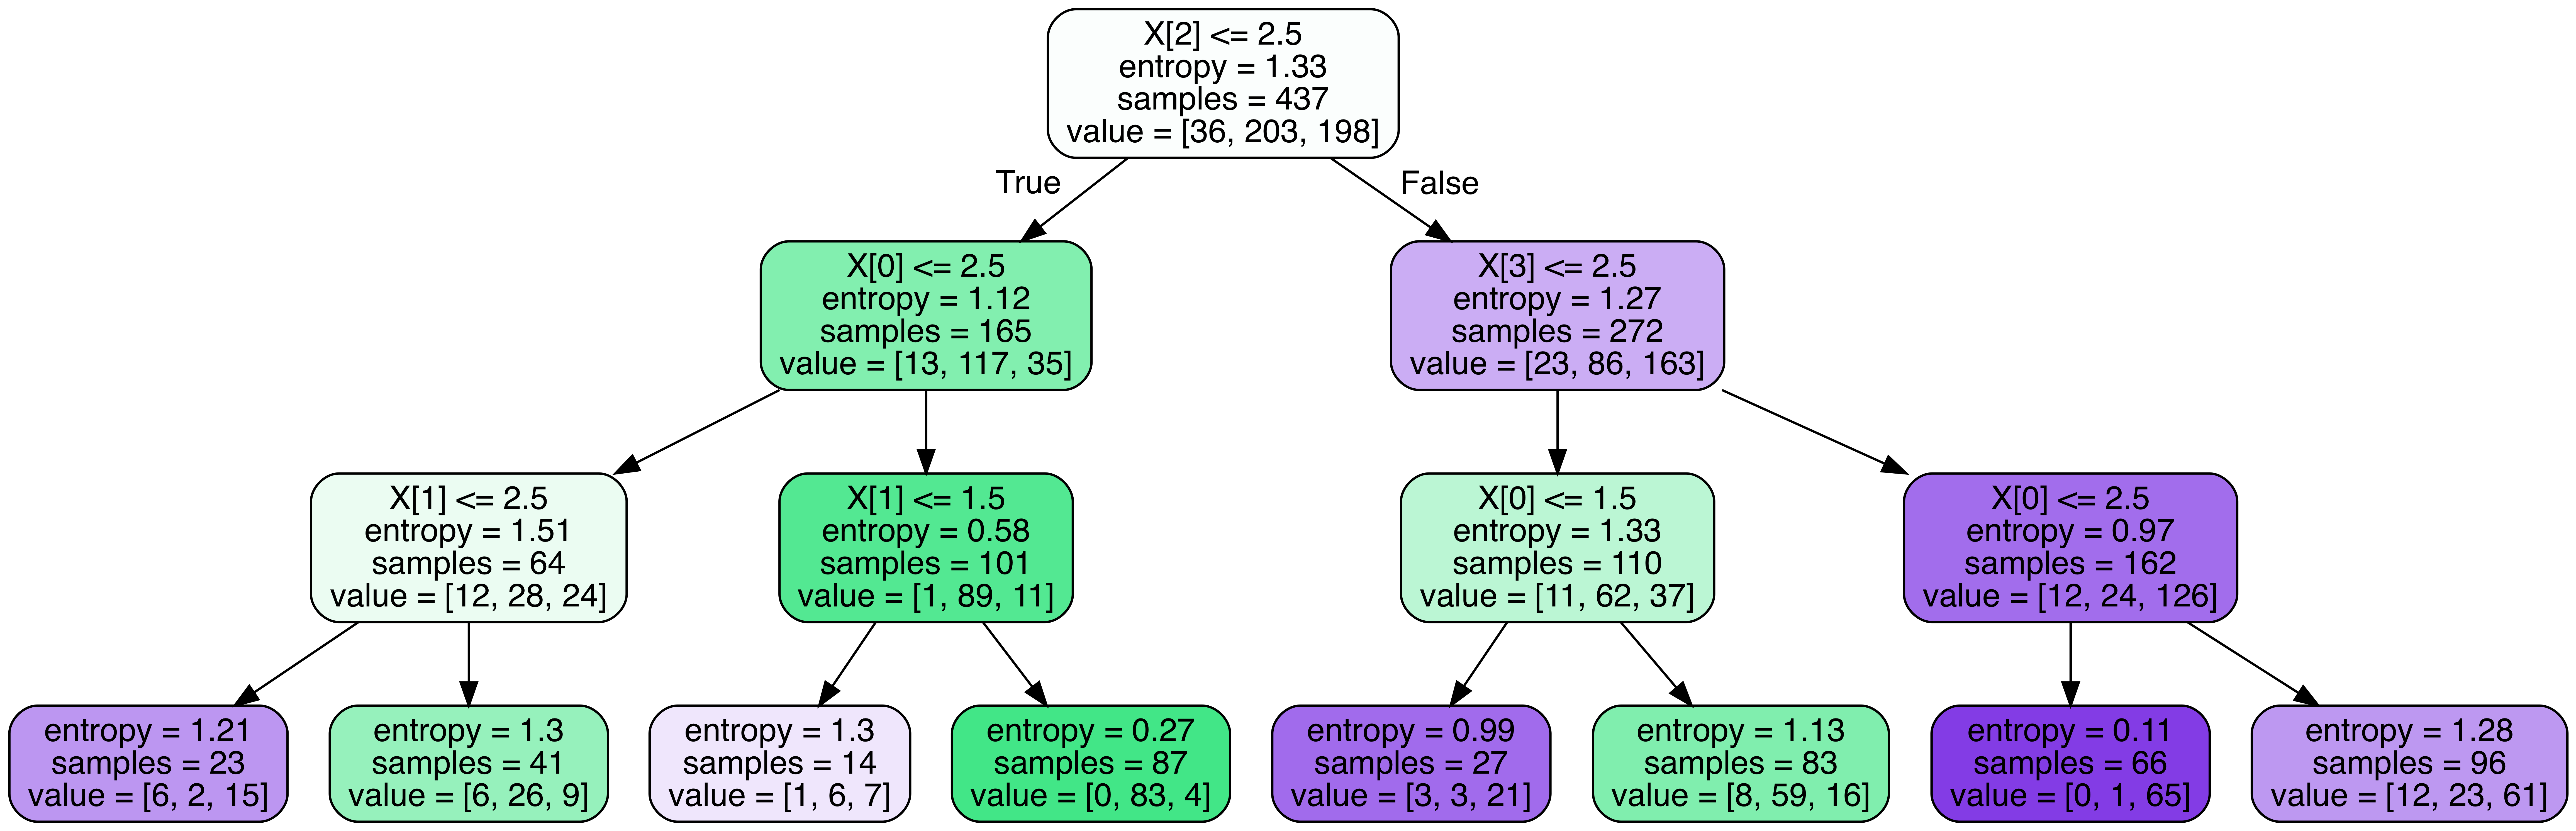

In [75]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [39]:
model.predict([[4, 4, 3, 3]])

array(['R'], dtype=object)

In [40]:
# Calculer la classe prédite pour chacune des valeurs de X_train et X_test 
y_train_pred = model.predict(X_train)
h = model.predict(X_test)
h

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

In [41]:
print("Train Accuracy is ", accuracy_score(y_train,y_train_pred)*100)
print("Test Accuracy is ", accuracy_score(y_test,h)*100)

# TODO : Comparer les deux valeurs, que constatez-vous ? 

Train Accuracy is  77.11670480549199
Test Accuracy is  70.74468085106383


##### Exemple d'un arbre de décision réel avec 50 features 
![](images/1_hW67kyPZZJ6I_7Z8huwDkg.png)

## 2- Random Forest 

L'objectif des forêts d'arbres décisionnels est d'éviter le surapprentissage sur les données d'entraînement et les généralisations la plus adéquate pour mieux prédire aux nouvelles données. 

Voici les étapes de base impliquées dans l'exécution de l'algorithme de forêt aléatoire:

* Choisissez N enregistrements aléatoires dans le jeu de données.
* Construisez un arbre de décision basé sur ces N enregistrements.
* Choisissez le nombre d'arbres souhaité dans votre algorithme et répétez les étapes 1 et 2.
* En cas de problème de régression, pour un nouvel enregistrement, chaque arbre de la forêt prédit une valeur pour Y (sortie). La valeur finale peut être calculée en prenant la moyenne de toutes les valeurs prédites par tous les arbres en forêt. Ou, en cas de problème de classification, chaque arbre de la forêt prédit la catégorie à laquelle appartient le nouvel enregistrement. Enfin, le nouvel enregistrement est attribué à la catégorie qui remporte le vote à la majorité.

### Random forest pour la régression 

In [42]:
dataset = pd.read_csv('./dataset/petrol_consumption.csv')  

In [43]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [44]:
X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values  

In [52]:
# TODO : Diviser le dataset (Trainset : 80%)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [54]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

In [55]:
from sklearn import metrics

y_train_pred = regressor.predict(X_train) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  


Mean Absolute Error: 6.144736842105266
Mean Absolute Error: 14.214999999999986
Mean Squared Error: 953.0432499999995
Root Mean Squared Error: 30.871398575380407


In [56]:
n_estimator = [20*i for i in range(1,11)]
errors = []
for n in n_estimator:
    regressor = RandomForestRegressor(n_estimators=n, random_state=0)  
    regressor.fit(X_train, y_train)  
    y_pred = regressor.predict(X_test) 
    errors.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

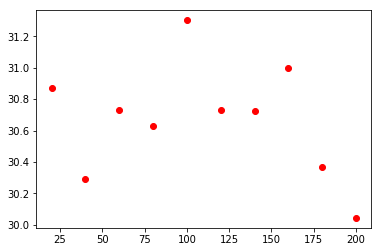

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_estimator,errors, 'ro')
plt.show()

### Random forest pour la classification 
Le but ici est de prédire si un billet de banque est authentique ou pas sur la base de 4 attributs; ex : la variance de l’image transformée, l’asymétrie, l’entropie.


In [58]:
dataset = pd.read_csv("dataset/bill_authentication.csv")  

In [59]:
dataset.head()  

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [60]:
X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [62]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [63]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred.round()))  
print(classification_report(y_test,y_pred.round()))  
print(accuracy_score(y_test, y_pred.round())) 

[[155   2]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9927272727272727


In [72]:
# TODO : Plotter le graphe des accuracy par rapport au changement du n_estimators.

n_estimator = [20*i for i in range(1,11)]
errors = []
for n in n_estimator:
    regressor = RandomForestRegressor(n_estimators=n, random_state=0)  
    regressor.fit(X_train, y_train)  
    y_pred = regressor.predict(X_test) 
    errors.append(accuracy_score(y_test,y_pred.round())*100)

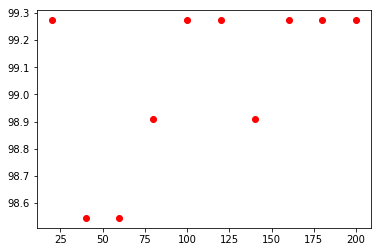

In [73]:
%matplotlib inline
plt.plot(n_estimator,errors, 'ro')
plt.show()